<a href="https://colab.research.google.com/github/tanmey007/Spark_Foundation/blob/master/Spark_Foundation_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Uploading dataset

In [2]:
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
iris=pd.read_csv('Iris.csv')

In [4]:
iris.set_index('Id',inplace=True)

## Visualisation

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


we have no missing values

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


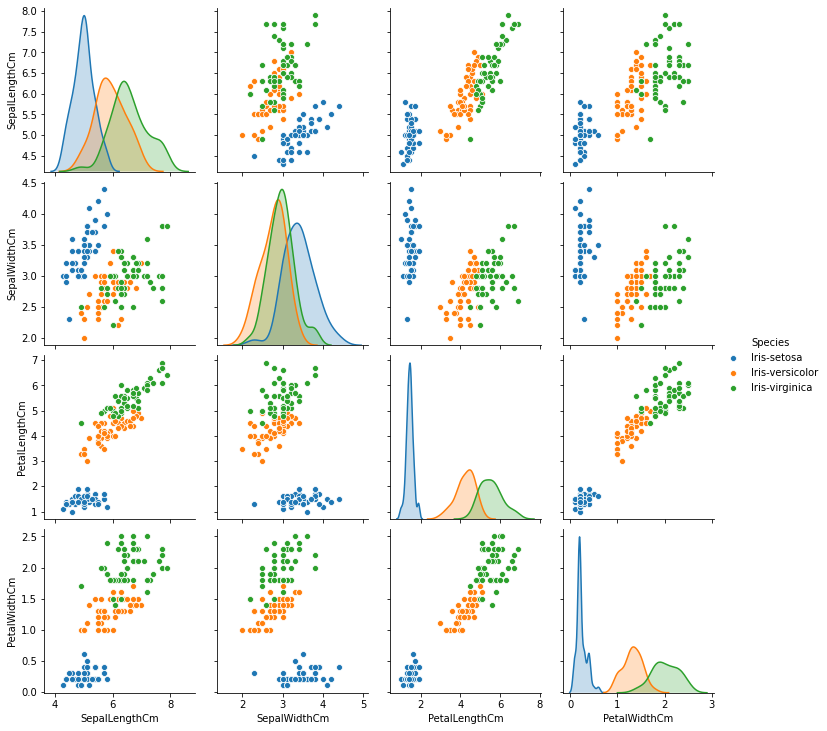

In [7]:
sns.pairplot(iris,hue='Species')

## Preprocessing the data

In [8]:
num_attributes=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cat_attributes=['Species']
num_pipeline=Pipeline([('std_scaler', StandardScaler()),])
cat_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])
iris_encoded=full_pipeline.fit_transform(iris)

## Finding optimal number of clusters

### Elbow method

Text(0, 0.5, 'WCSS')

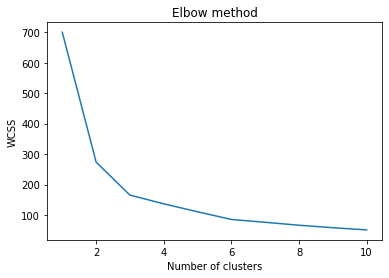

In [9]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
  kmeans.fit(iris_encoded)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

According to my interpretation 3 clusters are optimal

## Training K means model

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=5)
cluster_no=kmeans.fit_predict(iris_encoded)
cluster_no

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Visualizing clusters

### Sepal Length and Sepal width

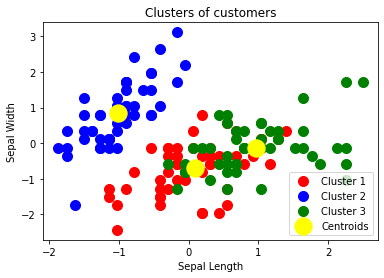

In [11]:
plt.scatter(iris_encoded[cluster_no == 0, 0], iris_encoded[cluster_no == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 0], iris_encoded[cluster_no == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 0], iris_encoded[cluster_no == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


### Sepal Length and Petal Length

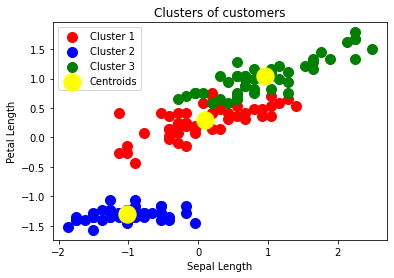

In [12]:
plt.scatter(iris_encoded[cluster_no == 0, 0], iris_encoded[cluster_no == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 0], iris_encoded[cluster_no == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 0], iris_encoded[cluster_no == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()


### Sepal Length and Petal width

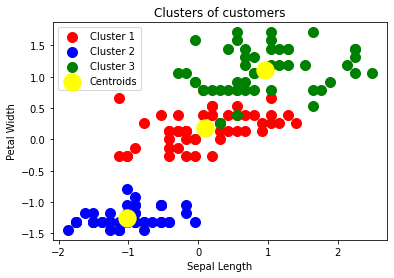

In [13]:
plt.scatter(iris_encoded[cluster_no == 0, 0], iris_encoded[cluster_no == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 0], iris_encoded[cluster_no == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 0], iris_encoded[cluster_no == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


### Sepal Width and Petal Length

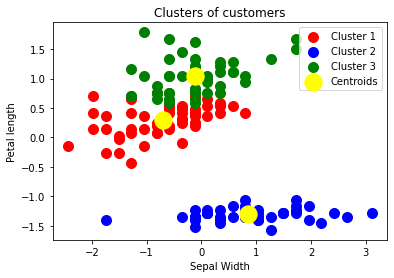

In [14]:
plt.scatter(iris_encoded[cluster_no == 0, 1], iris_encoded[cluster_no == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 1], iris_encoded[cluster_no == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 1], iris_encoded[cluster_no == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal length')
plt.legend()
plt.show()


### Sepal width and Petal width

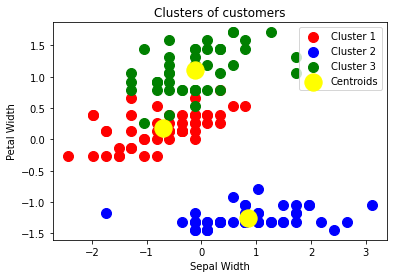

In [15]:
plt.scatter(iris_encoded[cluster_no == 0, 1], iris_encoded[cluster_no == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 1], iris_encoded[cluster_no == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 1], iris_encoded[cluster_no == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


### Petal Length and Petal width

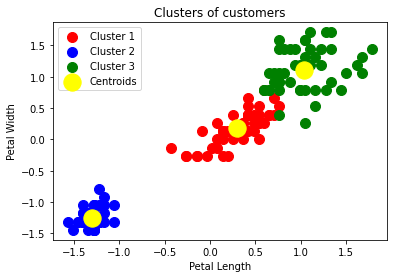

In [16]:
plt.scatter(iris_encoded[cluster_no == 0, 2], iris_encoded[cluster_no == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_encoded[cluster_no == 1, 2], iris_encoded[cluster_no == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_encoded[cluster_no == 2, 2], iris_encoded[cluster_no == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


## Compiling the Results

In [17]:
cluster_no=pd.DataFrame(cluster_no,index=iris.index,columns=['Cluster Number'])

In [18]:
final_output=pd.concat([iris,cluster_no],axis=1)

In [19]:
final_output.to_csv('clustering_iris.csv')
files.download('clustering_iris.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>